# SPARK FOUNDATION (GRIPAPRIL24 BATCH)
### Program : Data Science And Business Analytics Intern
### Name : Nada Youssef Ismail Youssef Amrawy
### Email : nadaaYoussef.202@gmail.com
### Linkedin account : https://www.linkedin.com/in/nada-youssef-b33066243/
### Github account : https://github.com/nadaYossef
### Task 7 : Stock Market Prediction Analysis Numerical & Textual data

## Steps I followed :
1. importing libraries
2. Data wrangling / loading
3. EDA : Exploring Data + Data cleaning + Analysis & Visualization
4. Feature Engineering : Data Preprocessing & Ensuring Data is Ready to be implemented in a ML model
5. Using LSTM approach to build model for numerical data & model evaluation
6. Using CNN approach to build model for categorical data & model evaluation
7. Combining these 2 models giving a hybrid deep learning model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scipy
from scipy import stats

In [2]:
news = pd.read_csv('/content/india-news-headlines (1).csv') # Textual dataset
news.tail()

,publish_date,headline_category,headline_text
1514303,20121207,entertainment.tamil.movies.news,Superstar's song teaser out online
1514304,20121207,sports.more-sports.others,IOC says newly elected IOA office-bearers have...
1514305,20121207,entertainment.marathi.movies.news,Sarpanch Bhagirath muhurat graced by Udaydada ...
1514306,20121207,entertainment.tamil.movies.news,Tabu to turn singer?
1514307,20121207,e,NaN


In [3]:
news.shape

(1514308, 3)

In [4]:
stock = pd.read_csv('/content/^IXIC.csv') # Numerical dataset uploaded from yahoo finance
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
467,2023-12-01,14181.349609,15150.070313,14058.519531,15011.349609,15011.349609,120361680000
468,2024-01-01,14873.700195,15630.580078,14477.570313,15164.009766,15164.009766,111351260000
469,2024-02-01,15254.019531,16134.219727,15208.879883,16091.919922,16091.919922,106763830000
470,2024-03-01,16109.830078,16538.859375,15862.629883,16379.459961,16379.459961,106387420000
471,2024-04-01,16397.050781,16490.650391,16046.559570,16175.089844,16175.089844,48438630000


In [5]:
stock.shape

(472, 7)

In [6]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,472.000000,472.000000,472.000000,472.000000,472.000000,4.720000e+02
mean,3478.076327,3633.240500,3319.357284,3504.876802,3504.876802,3.424131e+10
std,3794.064060,3958.375418,3623.834885,3824.902493,3824.902493,2.896898e+10
min,247.100006,278.899994,245.800003,278.700012,278.700012,1.334990e+09
25%,775.714996,794.815018,755.632492,778.817505,778.817505,6.668902e+09
50%,2136.935059,2212.614990,2049.260010,2145.975098,2145.975098,3.590318e+10
75%,4440.194946,4587.844971,4208.147339,4509.530152,4509.530152,4.345186e+10
max,16397.050781,16538.859375,16046.559570,16379.459961,16379.459961,1.429268e+11


In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       472 non-null    object 
 1   Open       472 non-null    float64
 2   High       472 non-null    float64
 3   Low        472 non-null    float64
 4   Close      472 non-null    float64
 5   Adj Close  472 non-null    float64
 6   Volume     472 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.9+ KB


In [8]:
stock['Date'] = pd.to_datetime(stock['Date'], format='%Y-%m-%d')
print(stock.Date.dtype)
print(stock['Date'][20])

datetime64[ns]
1986-09-01 00:00:00


In [9]:
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no null values

In [10]:
stock.duplicated().sum()

0

There are no duplicate values

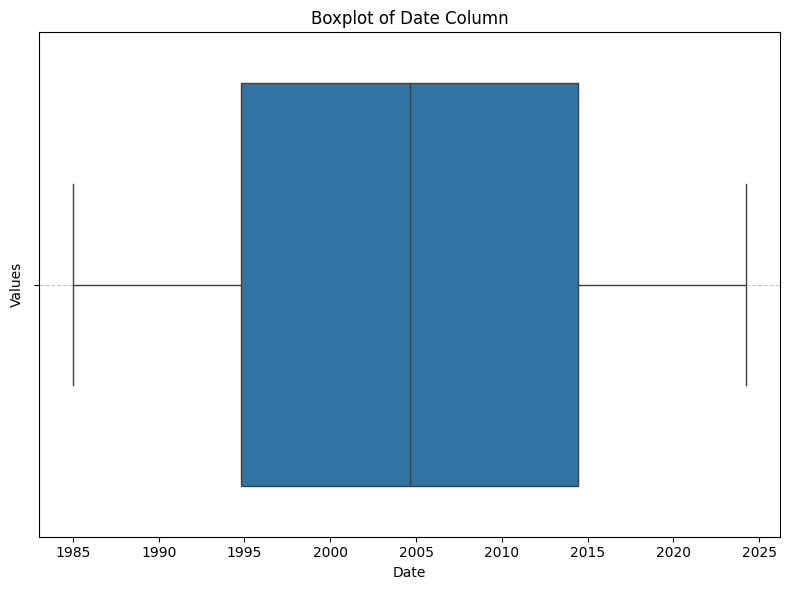

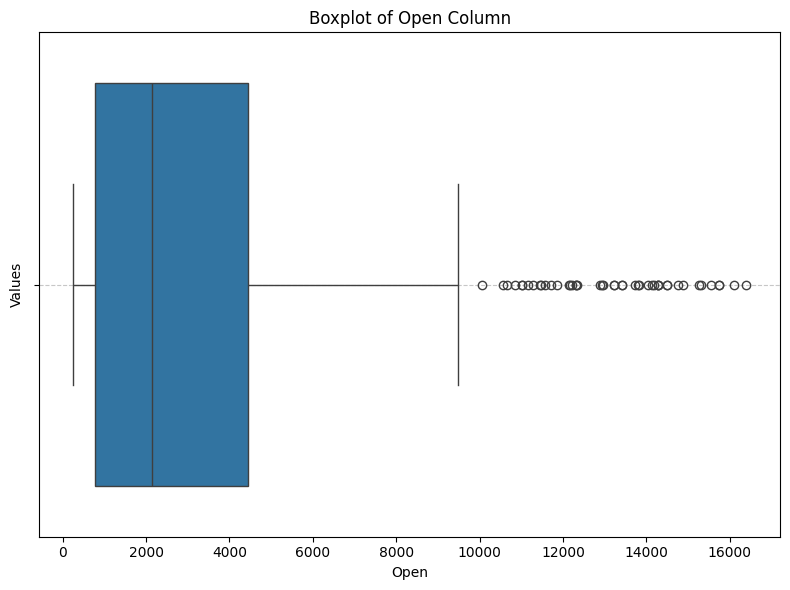

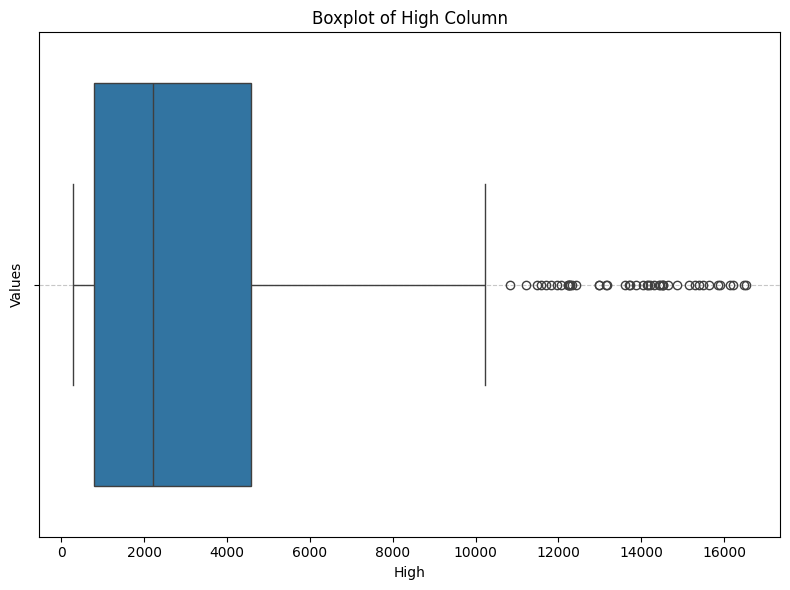

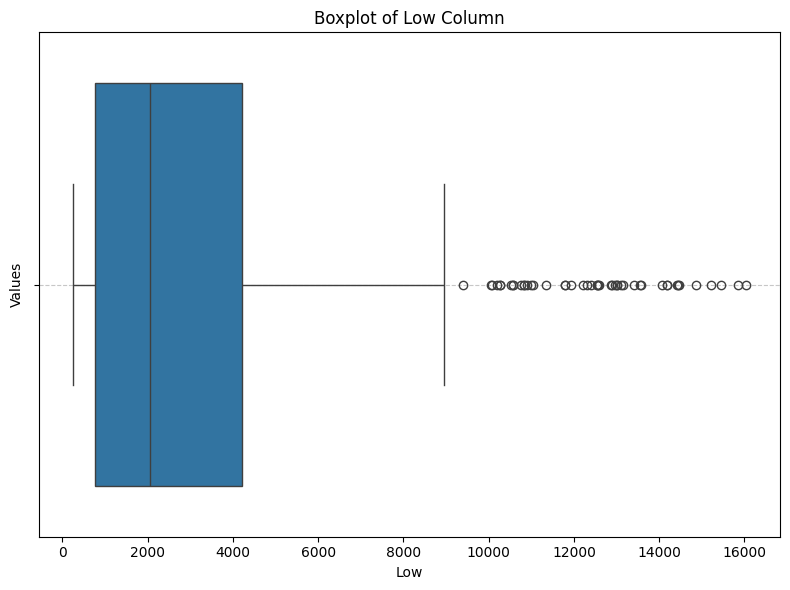

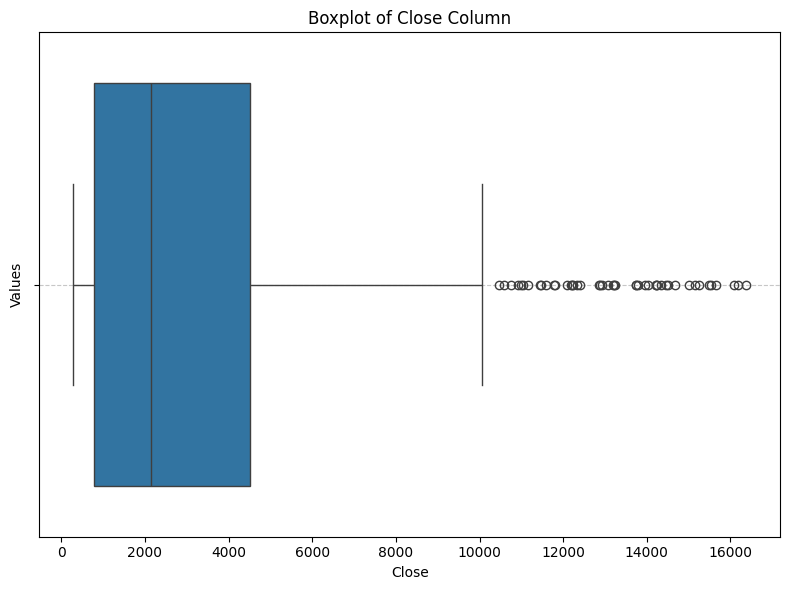

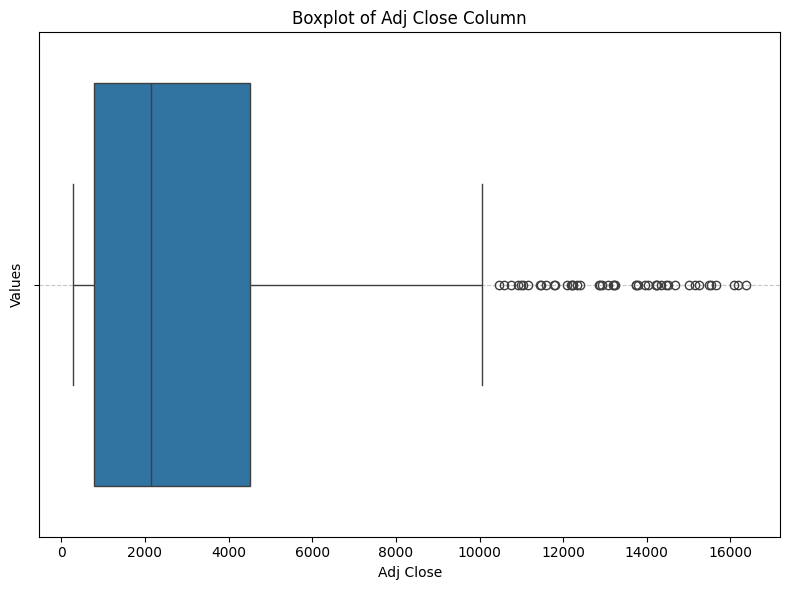

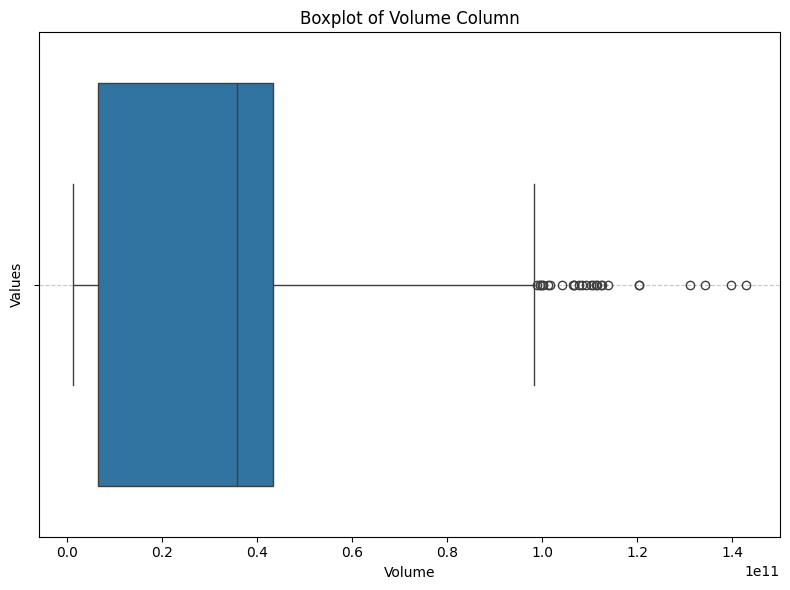

In [11]:
# Testing outliers using boxplot
for column in stock.columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.boxplot(x=stock[column])  # Specify 'x' to make it vertical
    plt.title(f'Boxplot of {column} Column')
    plt.xlabel(f'{column}')  # Add x-axis label
    plt.ylabel('Values')  # Add y-axis label
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
    plt.tight_layout()  # Improve spacing between subplots
    plt.show()


All data (except Date) contain alot of ouliers

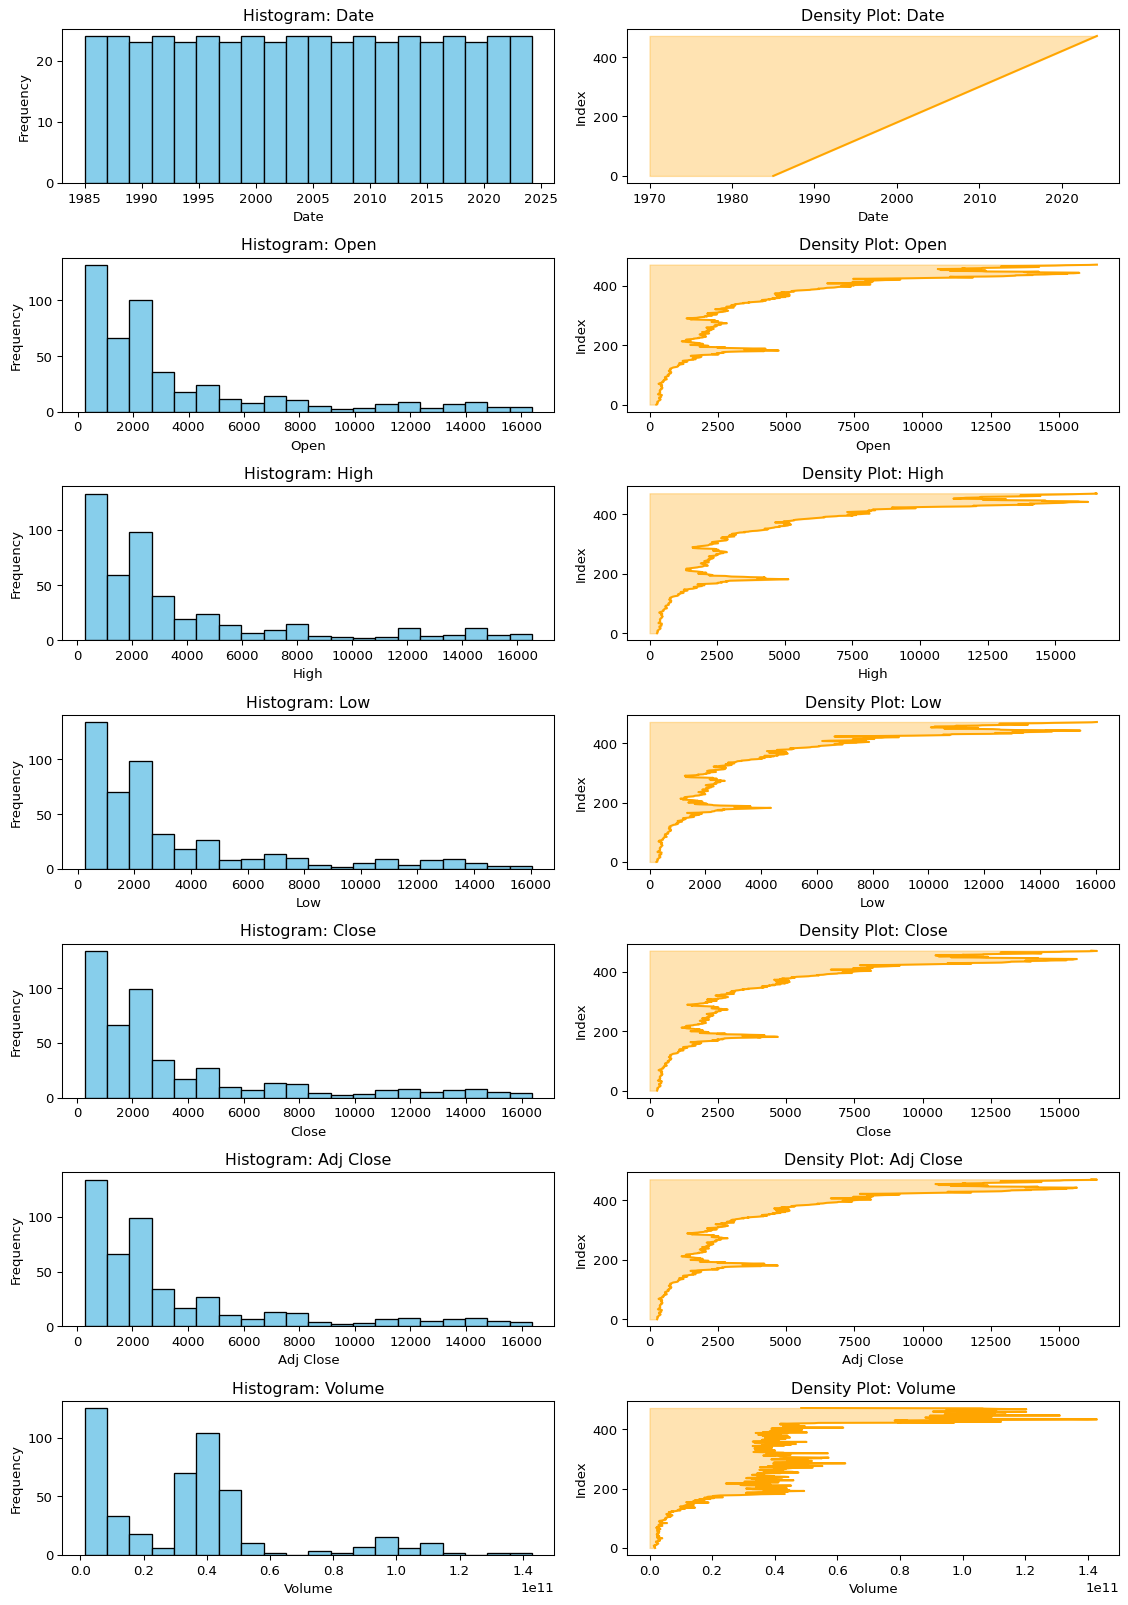

In [12]:
# Visualizing the distribution of stock data frame to decide if i should remove ot transform outliers
# Create histograms and density plots
fig, axs = plt.subplots(7, 2, figsize=(12, 17), dpi=95)

for i, col in enumerate(stock.columns):
    # Histogram
    axs[i, 0].hist(stock[col], bins=20, color='skyblue', edgecolor='black')
    axs[i, 0].set_title(f'Histogram: {col}')
    axs[i, 0].set_xlabel(col)
    axs[i, 0].set_ylabel('Frequency')

    # Density plot
    axs[i, 1].plot(stock[col], stock.index, color='orange')
    axs[i, 1].fill_betweenx(stock.index, stock[col], alpha=0.3, color='orange')
    axs[i, 1].set_title(f'Density Plot: {col}')
    axs[i, 1].set_xlabel(col)
    axs[i, 1].set_ylabel('Index')

plt.tight_layout()
plt.show()


Most distributions are highly skewed in which it's preferable to remove outliers as they will cause huge problem while uilding models and affect accuracy

In [13]:
# Remove all rows that have outliers in at least one column
stock_numeric = stock.select_dtypes(include=np.number)
stock_numeric[(np.abs(stats.zscore(stock_numeric)) < 3).all(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
0,247.100006,278.899994,245.800003,278.700012,278.700012,1782060000
1,277.899994,289.299988,277.899994,284.200012,284.200012,1742850000
2,285.100006,287.799988,275.600006,279.200012,279.200012,1611310000
3,279.500000,284.799988,276.200012,280.600006,280.600006,1506450000
4,280.500000,294.799988,278.799988,290.799988,290.799988,1673270000
...,...,...,...,...,...,...
462,13798.700195,14446.549805,13567.250000,14346.019531,14346.019531,96983440000
463,14274.929688,14309.209961,13161.759766,14034.969727,14034.969727,110754840000
464,14129.959961,14149.620117,12963.160156,13219.320313,13219.320313,94727650000
465,13217.980469,13714.139648,12543.860352,12851.240234,12851.240234,97818540000


### Let's Move on to textual data cleaning / feature engineering

In [14]:
import nltk  # Natural Language Toolkit
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In the next code we will preprocess news data frame to
tokenize : process of breaking down a larger body of text
stop words : To remove words like "is", "and"...etc.
Lemmatizer : reduce word to it's base

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
news['cleaned_headline_text'] = news['headline_text'].apply(lambda text: ' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(str(text)) if token.lower() not in stop_words]))

# Drop the original 'headline_text' column
news.drop(columns=['headline_text'], inplace=True)

# Print the cleaned DataFrame
print(news.head(3))

   publish_date headline_category                        cleaned_headline_text
0      20010102           unknown  Status quo disturbed Ayodhya ; say Vajpayee
1      20010102           unknown                  Fissures Hurriyat Pak visit
2      20010102           unknown          America 's unwanted heading India ?


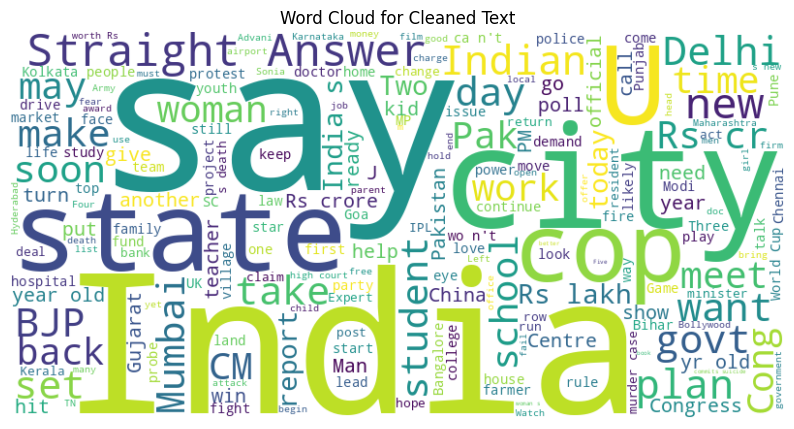

In [18]:
from wordcloud import WordCloud

text = ' '.join(news['cleaned_headline_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Cleaned Text")
plt.show()

We can tell data preprocessing went succesful after visualizing it

## Time Series (EDA)

In [21]:
rolling_avg = stock['Close'].rolling(window=10).mean() # MA

In [22]:
!pip install arch
import arch
from arch import arch_model
model = arch_model(stock['Close'], vol='Garch', p=1, q=1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 5.2 MB/s eta 0:00:00


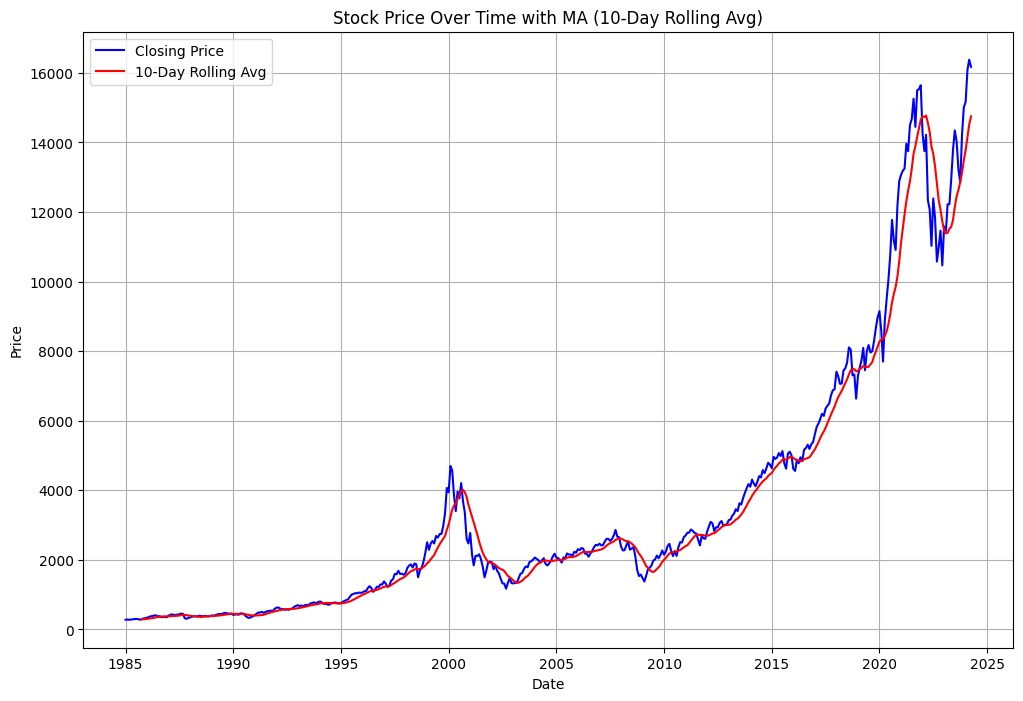

In [23]:
rolling_avg = stock['Close'].rolling(window=10).mean()

plt.figure(figsize=(12, 8))

# Plot stock closing price
sns.lineplot(x=stock['Date'], y=stock['Close'], label='Closing Price', color='b')

# Overlay the rolling average
sns.lineplot(x=stock['Date'], y=rolling_avg, label='10-Day Rolling Avg', color='r')

plt.title("Stock Price Over Time with MA (10-Day Rolling Avg)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

## What can we conclude from that plot ?
1. It shows that the prices over the years with 10 day rolling average remained relatively stable from 1985 to around the mid-2000s, with minor fluctuations.
2. there is a significant upward trend in the stock prices, indicating a period of growth.
3. Around the year 2020, the stock prices reached its peak and then experienced some volatility but maintained an overall upward trajectory. This suggests that while there were some periods of uncertainty or change, the overall trend of the stock prices remained positive.

## Numerical Data Preprocessing

In [24]:
# Lag Features (Target values from Past Stock Prices)
stock['Close_Lag1'] = stock['Close'].shift(1)
stock['Close_Lag2'] = stock['Close'].shift(2)

###technical indicators
1. rsi Relative Strength Index : trading tool
2. emw Exponential Moving Average : capture recent trends in time series
3. rolling mean / standard deviation

In [26]:
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock['RSI'] = calculate_rsi(stock)


In [27]:
short_ema = stock['Close'].ewm(span=12, adjust=False).mean()# macd
long_ema = stock['Close'].ewm(span=26, adjust=False).mean()
stock['MACD'] = short_ema - long_ema

In [28]:
rolling_mean = stock['Close'].rolling(window=20).mean() # bollinger
rolling_std = stock['Close'].rolling(window=20).std()
stock['Upper_Band'] = rolling_mean + 2 * rolling_std
stock['Lower_Band'] = rolling_mean - 2 * rolling_std


### Volatility measures

In [30]:
#Average True Range (ATR)
high_low_diff = stock['High'] - stock['Low']
high_close_diff = abs(stock['High'] - stock['Close'].shift(1))
low_close_diff = abs(stock['Low'] - stock['Close'].shift(1))
true_range = pd.concat([high_low_diff, high_close_diff, low_close_diff], axis=1).max(axis=1)
stock['ATR'] = true_range.rolling(window=14).mean()


In [31]:
# Historical Volatility
stock['Historical_Volatility'] = stock['Close'].rolling(window=30).std() * np.sqrt(252)

In [32]:
# Calendar Features
stock['DayOfWeek'] = stock['Date'].dt.dayofweek
stock['Month'] = stock['Date'].dt.month
stock['Quarter'] = stock['Date'].dt.quarter


## feauture engineering for text, sentiment anaylsis

In [34]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each headline
news['Sentiment_Score'] = news['cleaned_headline_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify cleaned_headline_texts as positive, negative, or neutral
news['Sentiment_Label'] = news['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# View the resulting DataFrame
print(news[['publish_date', 'cleaned_headline_text', 'Sentiment_Score', 'Sentiment_Label']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


         publish_date                              cleaned_headline_text  \
0            20010102        Status quo disturbed Ayodhya ; say Vajpayee   
1            20010102                        Fissures Hurriyat Pak visit   
2            20010102                America 's unwanted heading India ?   
3            20010102                           bigwig ; destination Goa   
4            20010102                    Extra bus clear tourist traffic   
...               ...                                                ...   
1514303      20121207                    Superstar 's song teaser online   
1514304      20121207  IOC say newly elected IOA office-bearer legiti...   
1514305      20121207    Sarpanch Bhagirath muhurat graced Udaydada Laad   
1514306      20121207                                 Tabu turn singer ?   
1514307      20121207                                                nan   

         Sentiment_Score Sentiment_Label  
0                -0.3818        Negative  
1

 ## Building LSTM model for stock (numerical dataset)
 *note* : i used stock svm previously but results are not satisfacting :
- stockTraining Accuracy: 0.6259946949602122
- stock Testing Accuracy: 0.4842105263157895

In [37]:
!pip install preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.6/349.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.1 MB/s eta 0:00:00
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367710 sha256=562a7947a67ffa4595d7fbd701b19fc3d49178191ded2f302ff5a7a6cbb3f032
  Stored in directory: /root/.cache/pip/wheels/0e/8c/42/bcd0934b61ecf4cef964ccc9881888cca0841ec72266e99de1
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [38]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score

In [39]:
closing_prices = stock['Close'].values.reshape(-1, 1)

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

In [41]:
train_size = int(len(closing_prices_scaled) * 0.8)
test_size = len(closing_prices_scaled) - train_size
train_data, test_data = closing_prices_scaled[0:train_size,:], closing_prices_scaled[train_size:len(closing_prices_scaled),:]


In [42]:
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

In [43]:
# Convert stock data into time series dataset
time_steps = 1
trainX, trainY = create_dataset(train_data, time_steps)
testX, testY = create_dataset(test_data, time_steps)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [44]:
# Step 1.5: Creating a LSTM Neural Network Model for Numerical Analysis
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, time_steps)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [45]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
12/12 - 10s - loss: 0.0123 - 10s/epoch - 856ms/step
Epoch 2/100
12/12 - 0s - loss: 0.0067 - 118ms/epoch - 10ms/step
Epoch 3/100
12/12 - 0s - loss: 0.0054 - 97ms/epoch - 8ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0050 - 88ms/epoch - 7ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0045 - 91ms/epoch - 8ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0039 - 86ms/epoch - 7ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0031 - 85ms/epoch - 7ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0022 - 80ms/epoch - 7ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0013 - 86ms/epoch - 7ms/step
Epoch 10/100
12/12 - 0s - loss: 6.0108e-04 - 81ms/epoch - 7ms/step
Epoch 11/100
12/12 - 0s - loss: 2.1388e-04 - 91ms/epoch - 8ms/step
Epoch 12/100
12/12 - 0s - loss: 9.4691e-05 - 104ms/epoch - 9ms/step
Epoch 13/100
12/12 - 0s - loss: 9.5153e-05 - 121ms/epoch - 10ms/step
Epoch 14/100
12/12 - 0s - loss: 9.4182e-05 - 99ms/epoch - 8ms/step
Epoch 15/100
12/12 - 0s - loss: 9.4573e-05 - 131ms/epoch - 11ms/step
Epoch 16/100
12/12 - 0s - loss:

In [46]:
# Predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverse transform the predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

3/3 [==============================] - 0s 14ms/step


## Model evaluation and plotting LSTM

In [47]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
testScore = np.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 149.72
Test RMSE: 656.85


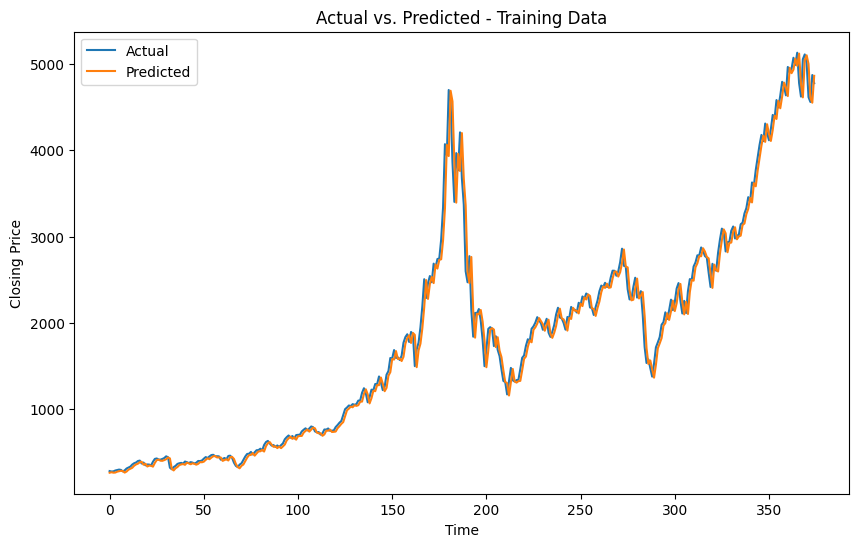

In [48]:
# Plotting the actual vs. predicted values for training data
plt.figure(figsize=(10, 6))
plt.plot(trainY_inverse[0], label='Actual')
plt.plot(trainPredict, label='Predicted')
plt.title('Actual vs. Predicted - Training Data')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

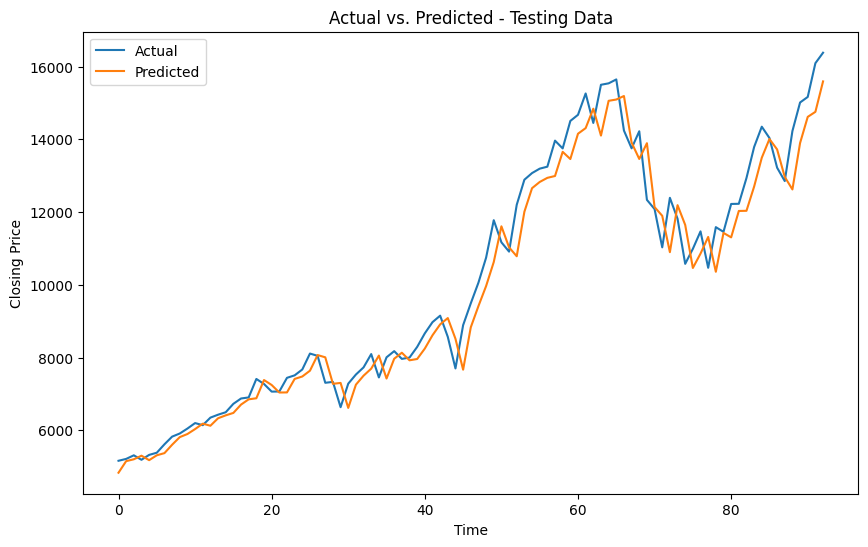

In [49]:
# Plotting the actual vs. predicted values for testing data
plt.figure(figsize=(10, 6))
plt.plot(testY_inverse[0], label='Actual')
plt.plot(testPredict, label='Predicted')
plt.title('Actual vs. Predicted - Testing Data')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [52]:
# Define a threshold for accuracy percentage
threshold = 0.05  # 5%

# Calculate the absolute percentage error for each prediction
train_abs_percentage_error = np.abs(trainPredict[:, 0] - trainY_inverse[0]) / trainY_inverse[0]
test_abs_percentage_error = np.abs(testPredict[:, 0] - testY_inverse[0]) / testY_inverse[0]

# Count the number of predictions within the threshold
train_accuracy_percentage = np.mean(train_abs_percentage_error <= threshold) * 100
test_accuracy_percentage = np.mean(test_abs_percentage_error <= threshold) * 100

print('Train Accuracy Percentage (within {}%): {:.2f}%'.format(threshold * 100, train_accuracy_percentage))
print('Test Accuracy Percentage (within {}%): {:.2f}%'.format(threshold * 100, test_accuracy_percentage))

Train Accuracy Percentage (within 5.0%): 55.73%
Test Accuracy Percentage (within 5.0%): 59.14%


Relatively Satisfying Result

## Building CNN Convolutional Neural Network for textual data (news)

In [55]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(news['cleaned_headline_text'], news['Sentiment_Label'], test_size=0.2, random_state=42)

In [60]:
from keras.preprocessing.sequence import pad_sequences
# Tokenizing text and converting into lists of words
X_train_tokenized = [text.split() for text in X_train]
X_test_tokenized = [text.split() for text in X_test]

# Filter out non-numeric elements
X_train_numeric = [[word for word in seq if word.isdigit()] for seq in X_train_tokenized]
X_test_numeric = [[word for word in seq if word.isdigit()] for seq in X_test_tokenized]

# Padding sequences to ensure uniform length
max_length = max([len(seq) for seq in X_train_numeric + X_test_numeric])
X_train_pad = pad_sequences(X_train_numeric, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_numeric, maxlen=max_length, padding='post')


In [70]:
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences

# Set parameters for tokenizer
max_words = 1000  # Limit the number of words in the vocabulary
max_length = 100  # Limit the maximum sequence length
embedding_dim = 50  # Dimension of the word embeddings

# Initialize tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_tokenized)

# Convert text data to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train_tokenized)
X_test_seq = tokenizer.texts_to_sequences(X_test_tokenized)

# Pad sequences to ensure uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Building the CNN model
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_length))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))

# Compiling the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
cnn_model.fit(X_train_pad, y_train_encoded, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_encoded))



Epoch 1/5
18929/18929 [==============================] - 910s 48ms/step - loss: -774258.1250 - accuracy: 0.5585 - val_loss: -2742503.5000 - val_accuracy: 0.5585
Epoch 2/5
18929/18929 [==============================] - 1073s 57ms/step - loss: -8621168.0000 - accuracy: 0.5593 - val_loss: -17083704.0000 - val_accuracy: 0.5612
Epoch 3/5
18929/18929 [==============================] - 1089s 58ms/step - loss: -32429712.0000 - accuracy: 0.5594 - val_loss: -51624236.0000 - val_accuracy: 0.5587
Epoch 4/5
18929/18929 [==============================] - 919s 49ms/step - loss: -80842200.0000 - accuracy: 0.5592 - val_loss: -114717472.0000 - val_accuracy: 0.5599
Epoch 5/5
18929/18929 [==============================] - 1044s 55ms/step - loss: -162008352.0000 - accuracy: 0.5593 - val_loss: -214772320.0000 - val_accuracy: 0.5602


## Combining both models for hybrid model result



In [84]:

from keras.layers import Input, Concatenate, Dense
from keras.models import Model

# Reshape trainX and testX to include the time dimension
trainX = np.reshape(trainX, (trainX.shape[0], 1, 1))
testX = np.reshape(testX, (testX.shape[0], 1, 1))

# Define the LSTM model input
lstm_input = Input(shape=(1, trainX.shape[2]), name='lstm_input')

# LSTM layers
lstm_layers = LSTM(units=50, return_sequences=True)(lstm_input)
lstm_layers = LSTM(units=50)(lstm_layers)

# Combine LSTM and CNN outputs
combined_layers = Concatenate()([lstm_layers, cnn_model.output])
final_output = Dense(1, activation='sigmoid')(combined_layers)

# Define the hybrid model
hybrid_model = Model(inputs=[lstm_input, cnn_model.input], outputs=final_output)

# Compile the model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
hybrid_model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 embedding_6_input (InputLa  [(None, 100)]                0         []                            
 yer)                                                                                             
                                                                                                  
 embedding_6 (Embedding)     (None, 100, 50)              50000     ['embedding_6_input[0][0]']   
                                                                                                  
 conv1d_6 (Conv1D)           (None, 96, 128)              32128     ['embedding_6[0][0]']         
                                                                                                  
 lstm_input (InputLayer)     [(None, 1, 1)]               0         []                      

The model has a total of 118,925 parameters, all of which are trainable.